In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

/home/tek2991/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment -III_class_Nursery.xlsx');
df2 = pd.read_excel('Formative Assessment -4_class_Nursery.xlsx');
df3 = pd.read_excel('Anuual Exam 2024_class_Nursery.xlsx');

# In df3, where the Full Mark is not 50, multuply the Full Mark, Pass Mark and Marks Secured by 50/Full Mark
# df3.loc[df3['Full Mark']!=50, 'Pass Mark'] = df3['Pass Mark']*50/df3['Full Mark'];
# df3.loc[df3['Full Mark']!=50, 'Marks Secured'] = df3['Marks Secured']*50/df3['Full Mark'];
# df3.loc[df3['Full Mark']!=50, 'Full Mark'] = df3['Full Mark']*50/df3['Full Mark'];

# In df2 and df1, where the Full Mark is not 25, multuply the Full Mark, Pass Mark and Marks Secured by 25/Full Mark
# df2.loc[df2['Full Mark']!=25, 'Pass Mark'] = df2['Pass Mark']*25/df2['Full Mark'];
# df2.loc[df2['Full Mark']!=25, 'Marks Secured'] = df2['Marks Secured']*25/df2['Full Mark'];
# df2.loc[df2['Full Mark']!=25, 'Full Mark'] = df2['Full Mark']*25/df2['Full Mark'];

# df1.loc[df1['Full Mark']!=25, 'Pass Mark'] = df1['Pass Mark']*25/df1['Full Mark'];
# df1.loc[df1['Full Mark']!=25, 'Marks Secured'] = df1['Marks Secured']*25/df1['Full Mark'];
# df1.loc[df1['Full Mark']!=25, 'Full Mark'] = df1['Full Mark']*25/df1['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2023-2024,Formative Assessment -III,Offline,Rhymes,Evaluating,25,7,0 %,Arman Ali,Nursery,A,1,5.0,Fail
1,2023-2024,Formative Assessment -III,Offline,Oral English,Evaluating,10,3,0 %,Arman Ali,Nursery,A,1,5.0,Pass
2,2023-2024,Formative Assessment -III,Offline,Oral Maths,Evaluating,10,3,0 %,Arman Ali,Nursery,A,1,0.0,Fail
3,2023-2024,Formative Assessment -III,Offline,English,Evaluating,25,7,0 %,Arman Ali,Nursery,A,1,2.0,Fail
4,2023-2024,Formative Assessment -III,Offline,Maths,Evaluating,25,7,0 %,Arman Ali,Nursery,A,1,6.0,Fail


In [3]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  101
Student names with value 0 in marks secured column:  ['Arman Ali' 'Riyan Rabha' 'Aryan Bhagat' 'Niket Kumar Choudhury'
 'Harshita Kalita' 'Rishi Rohang' 'Arrika Chetri' 'Nirabh Jyoti Gyan'
 'Ankita Kumari' 'Mridansh Das' 'Sauvik Das' 'Satyam Kumar Yadav'
 'Ayan Dubey' 'Priyanshi Medhi' 'Kritika Barman']


In [4]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [5]:
# print the number of subjects
print('Number of Subjects: ', len(subjects));
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));

# print the number of exams
print('Number of Exams: ', len(exams));

Number of Subjects:  6
Subjects:  ['Rhymes' 'Oral English' 'Oral Maths' 'English' 'Maths' 'Drawing']
Number of Students:  42
Number of Exams:  3


In [6]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Arman Ali,Nursery,A,1.0
1,Parismita Konwar,Nursery,A,2.0
2,Longbir Rongpi,Nursery,A,3.0
3,Nilakshi Kro,Nursery,A,4.0
4,Anish Sumar,Nursery,A,5.0


In [7]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Anuual Exam 2024_Oral Maths_pass,Anuual Exam 2024_English,Anuual Exam 2024_English_total,Anuual Exam 2024_English_pass,Anuual Exam 2024_Maths,Anuual Exam 2024_Maths_total,Anuual Exam 2024_Maths_pass,Anuual Exam 2024_Drawing,Anuual Exam 2024_Drawing_total,Anuual Exam 2024_Drawing_pass
0,Arman Ali,Nursery,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parismita Konwar,Nursery,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Longbir Rongpi,Nursery,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nilakshi Kro,Nursery,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anish Sumar,Nursery,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student is in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Anuual Exam 2024_Oral Maths_pass,Anuual Exam 2024_English,Anuual Exam 2024_English_total,Anuual Exam 2024_English_pass,Anuual Exam 2024_Maths,Anuual Exam 2024_Maths_total,Anuual Exam 2024_Maths_pass,Anuual Exam 2024_Drawing,Anuual Exam 2024_Drawing_total,Anuual Exam 2024_Drawing_pass
0,Arman Ali,Nursery,A,1.0,5,25,7,5.0,10,3,...,9,20.0,50,15,7.5,50,15,33,50,15
1,Parismita Konwar,Nursery,A,2.0,23,25,7,6.0,10,3,...,9,47.0,50,15,49.0,50,15,41,50,15
2,Longbir Rongpi,Nursery,A,3.0,19,25,7,8.0,10,3,...,9,48.0,50,15,47.0,50,15,38,50,15
3,Nilakshi Kro,Nursery,A,4.0,19,25,7,6.0,10,3,...,9,47.0,50,15,43.0,50,15,35,50,15
4,Anish Sumar,Nursery,A,5.0,17,25,7,3.0,10,3,...,9,18.0,50,15,10.5,50,15,31,50,15


In [9]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Anuual Exam 2024_Maths_pass,Anuual Exam 2024_Drawing,Anuual Exam 2024_Drawing_total,Anuual Exam 2024_Drawing_pass,Weightage Rhymes,Weightage Oral English,Weightage Oral Maths,Weightage English,Weightage Maths,Weightage Drawing
0,Arman Ali,Nursery,A,1.0,5,25,7,5.0,10,3,...,15,33,50,15,NaN,NaN,NaN,NaN,NaN,NaN
1,Parismita Konwar,Nursery,A,2.0,23,25,7,6.0,10,3,...,15,41,50,15,NaN,NaN,NaN,NaN,NaN,NaN
2,Longbir Rongpi,Nursery,A,3.0,19,25,7,8.0,10,3,...,15,38,50,15,NaN,NaN,NaN,NaN,NaN,NaN
3,Nilakshi Kro,Nursery,A,4.0,19,25,7,6.0,10,3,...,15,35,50,15,NaN,NaN,NaN,NaN,NaN,NaN
4,Anish Sumar,Nursery,A,5.0,17,25,7,3.0,10,3,...,15,31,50,15,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate the weightage for each subject by taking the 100% from FA3, 100% from FA4 and 100% from Annual
for subject in subjects:
    df_new['Weightage ' + subject] = round(df_new['Formative Assessment -III_' + subject] * 1.0 + df_new['Formative Assessment -4_' + subject] * 1.0 + df_new['Anuual Exam 2024_' + subject] * 1.0, 2);
    # Calculate the full weightage for each subject by taking the 100% from FA3, 100% from FA4 and 100% from Annual
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment -III_' + subject + '_total'] * 1.0 + df_new['Formative Assessment -4_' + subject + '_total'] * 1.0 + df_new['Anuual Exam 2024_' + subject + '_total'] * 1.0;

In [11]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

In [12]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Weightage English total,Weightage Maths total,Weightage Drawing total,Result Rhymes,Result Oral English,Result Oral Maths,Result English,Result Maths,Result Drawing,Total Weightage
0,Arman Ali,Nursery,A,1.0,5,25,7,5.0,10,3,...,100.0,100.0,100.0,Fail,Fail,Fail,Fail,Fail,Pass,137.5
1,Parismita Konwar,Nursery,A,2.0,23,25,7,6.0,10,3,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,451.5
2,Longbir Rongpi,Nursery,A,3.0,19,25,7,8.0,10,3,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,412.5
3,Nilakshi Kro,Nursery,A,4.0,19,25,7,6.0,10,3,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,390.0
4,Anish Sumar,Nursery,A,5.0,17,25,7,3.0,10,3,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Fail,Pass,227.5


In [13]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

In [14]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False, method='min');

In [15]:
# Print the first row
df_new.iloc[0]

Student Name                        Arman Ali
Class                                 Nursery
Section                                     A
Roll No                                   1.0
Formative Assessment -III_Rhymes            5
                                      ...    
Total Weightage                         137.5
Result                                   Fail
Total Marks                             500.0
Percentage                               27.5
Rank                                     36.0
Name: 0, Length: 81, dtype: object

In [16]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Result Oral English,Result Oral Maths,Result English,Result Maths,Result Drawing,Total Weightage,Result,Total Marks,Percentage,Rank
0,Arman Ali,Nursery,A,1.0,5,25,7,5.0,10,3,...,Fail,Fail,Fail,Fail,Pass,137.5,Fail,500.0,27.5,36.0
1,Parismita Konwar,Nursery,A,2.0,23,25,7,6.0,10,3,...,Pass,Pass,Pass,Pass,Pass,451.5,Pass,500.0,90.3,5.0
2,Longbir Rongpi,Nursery,A,3.0,19,25,7,8.0,10,3,...,Pass,Pass,Pass,Pass,Pass,412.5,Pass,500.0,82.5,16.0
3,Nilakshi Kro,Nursery,A,4.0,19,25,7,6.0,10,3,...,Pass,Pass,Pass,Pass,Pass,390.0,Pass,500.0,78.0,21.0
4,Anish Sumar,Nursery,A,5.0,17,25,7,3.0,10,3,...,Pass,Pass,Pass,Fail,Pass,227.5,Pass,500.0,45.5,33.0
5,Viyona Sinha,Nursery,A,6.0,14,25,7,4.0,10,3,...,Pass,Fail,Pass,Pass,Pass,289.0,Pass,500.0,57.8,28.0
6,Dyansh Banik,Nursery,A,7.0,20,25,7,3.0,10,3,...,Pass,Pass,Pass,Pass,Pass,336.5,Pass,500.0,67.3,23.0
7,Mriganka Das,Nursery,A,8.0,8,25,7,5.0,10,3,...,Pass,Pass,Pass,Pass,Pass,315.5,Pass,500.0,63.1,25.0
8,Akanksha lalung,Nursery,A,9.0,23,25,7,9.0,10,3,...,Pass,Pass,Pass,Pass,Pass,450.0,Pass,500.0,90.0,6.0
9,Trishna Rohang,Nursery,A,10.0,23,25,7,4.0,10,3,...,Pass,Pass,Pass,Pass,Pass,297.0,Pass,500.0,59.4,27.0


In [17]:
# Export the dataframe to excel
df_new.to_excel('Result_Final.xlsx', index=False);

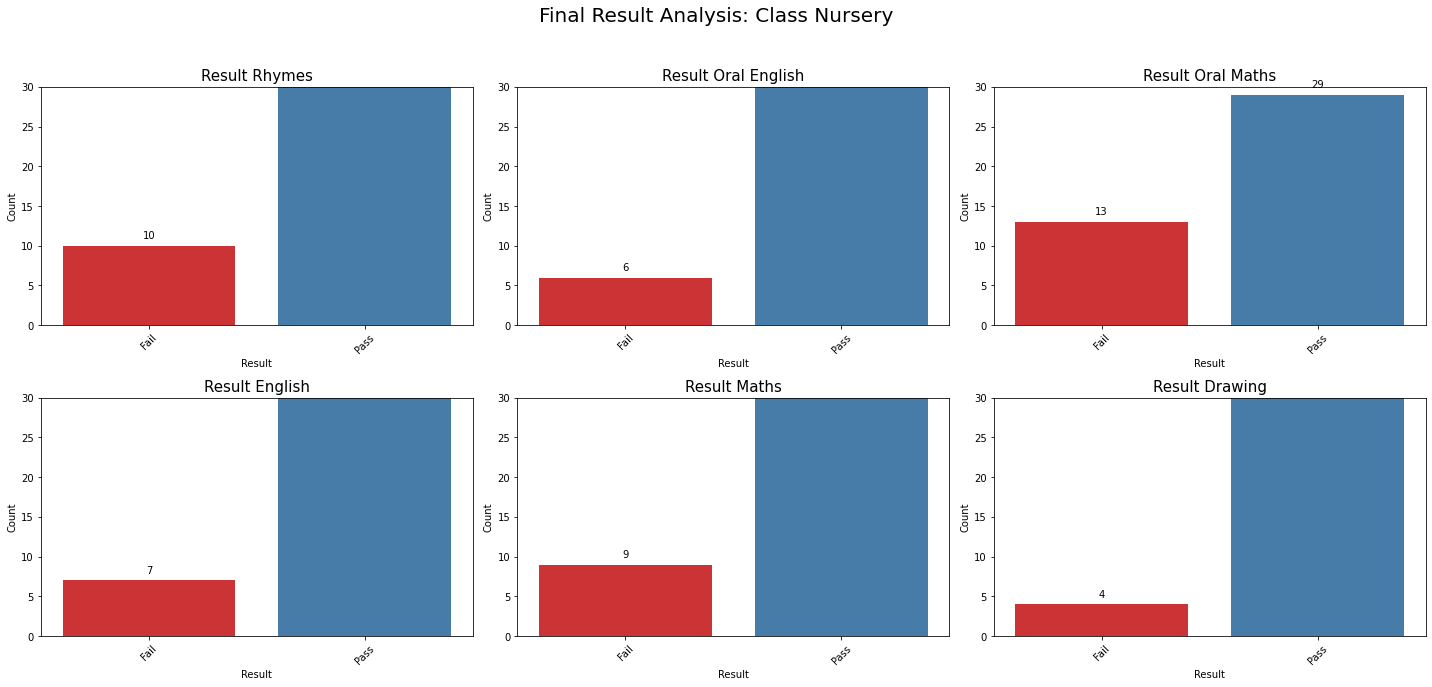

In [18]:
# Combine the charts in one figure
fig, axes = plt.subplots(2, 3, figsize=(20, 10));

# Set the title of the figure
fig.suptitle('Final Result Analysis: Class Nursery', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
    axes[i // 3, i % 3].set_title('Result ' + subject, fontsize=15);
    axes[i // 3, i % 3].set_xlabel('Result', fontsize=10);
    axes[i // 3, i % 3].set_ylabel('Count', fontsize=10);
    axes[i // 3, i % 3].tick_params(labelsize=10);
    axes[i // 3, i % 3].set_xticklabels(axes[i // 3, i % 3].get_xticklabels(), rotation=45);
    # Add top padding
    axes[i // 3, i % 3].set_ylim([0, 30]);

    # Add the count on top of the bars
    for p in axes[i // 3, i % 3].patches:
        axes[i // 3, i % 3].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');
    
# Add large gap between rows
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show();

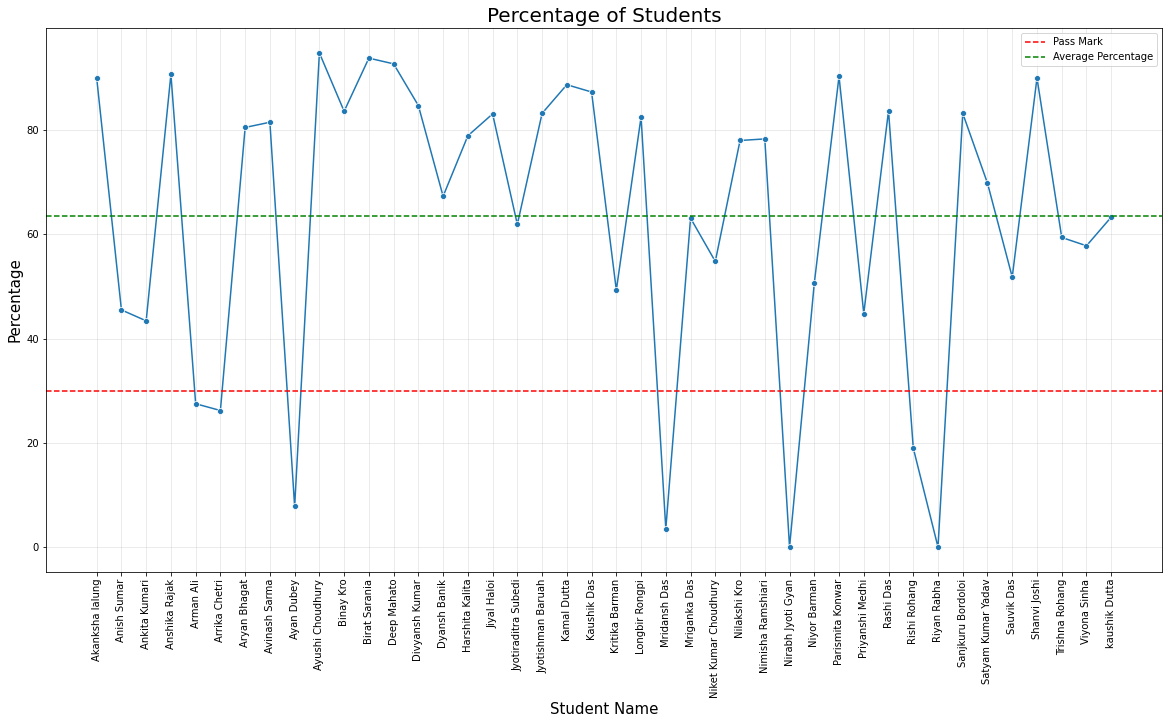

In [19]:
# A line plot with student names on x-axis and percentage on y-axis.
# Ordered by rank
# Add a horizontal line at 30% to show the pass mark
# Add a horizontal line to show the average percentage
# Points with percentage less than 30% are red and points with percentage greater than 30% are green

plt.figure(figsize=(20, 10));
sns.lineplot(x='Student Name', y='Percentage', data=df_new.sort_values('Student Name'), marker='o');
plt.axhline(y=30, color='r', linestyle='--', label='Pass Mark');
plt.axhline(y=df_new['Percentage'].mean(), color='g', linestyle='--', label='Average Percentage');
plt.title('Percentage of Students', fontsize=20);
plt.xlabel('Student Name', fontsize=15);
plt.ylabel('Percentage', fontsize=15);
plt.xticks(rotation=90);
plt.legend();

# Add transparant grid lines at every 10% on y-axis
plt.grid(alpha=0.3);

plt.show();